In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [95]:
df = pd.read_csv('student_performance_large_dataset.csv' , usecols=['Age', 'Study_Hours_per_Week','Assignment_Completion_Rate (%)','Exam_Score (%)'])

In [96]:
df.head()

,Age,Study_Hours_per_Week,Assignment_Completion_Rate (%),Exam_Score (%)
0,18,48,100,69
1,29,30,71,40
2,20,47,60,43
3,23,13,63,70
4,19,24,59,63


In [97]:
df.isnull().sum()

Age                               0
Study_Hours_per_Week              0
Assignment_Completion_Rate (%)    0
Exam_Score (%)                    0
dtype: int64

In [98]:
df.describe()

,Age,Study_Hours_per_Week,Assignment_Completion_Rate (%),Exam_Score (%)
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,23.478800,27.130300,74.922000,70.188900
std,3.461986,13.002547,14.675437,17.649447
min,18.000000,5.000000,50.000000,40.000000
25%,20.000000,16.000000,62.000000,55.000000
50%,23.000000,27.000000,75.000000,70.000000
75%,27.000000,38.000000,88.000000,85.000000
max,29.000000,49.000000,100.000000,100.000000


In [99]:
X = df.iloc[: , 0:3]
Y = df.iloc[: , -1]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [101]:
X_train.shape, y_train.shape

((8000, 3), (8000,))

D:\Temp\ipykernel_7232\814778999.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


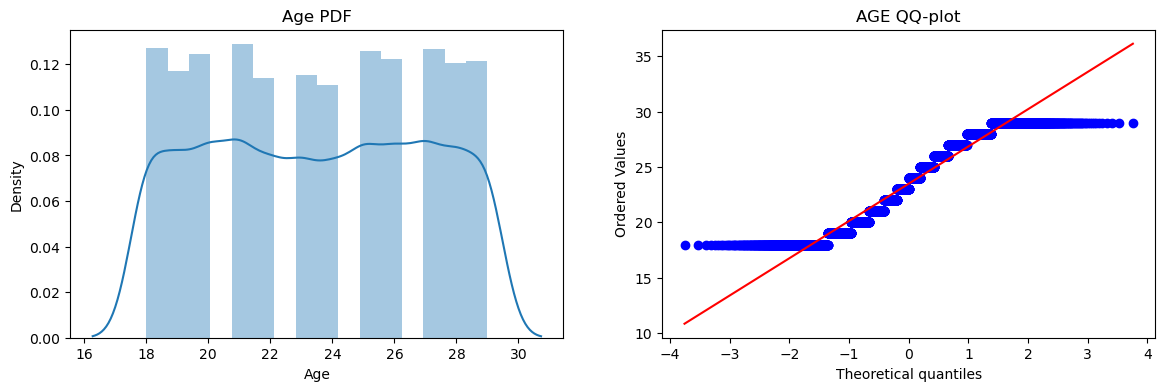

In [102]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('AGE QQ-plot')
plt.show()

D:\Temp\ipykernel_7232\167546659.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Study_Hours_per_Week'])


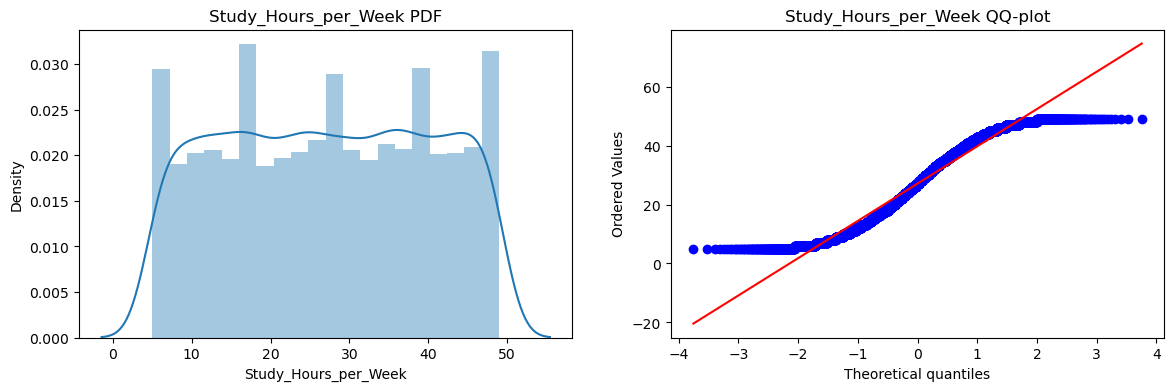

In [103]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot(X_train['Study_Hours_per_Week'])
plt.title('Study_Hours_per_Week PDF')

plt.subplot(122)
stats.probplot(X_train['Study_Hours_per_Week'], dist='norm', plot=plt)
plt.title('Study_Hours_per_Week QQ-plot')
plt.show()

D:\Temp\ipykernel_7232\787632034.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Assignment_Completion_Rate (%)'])


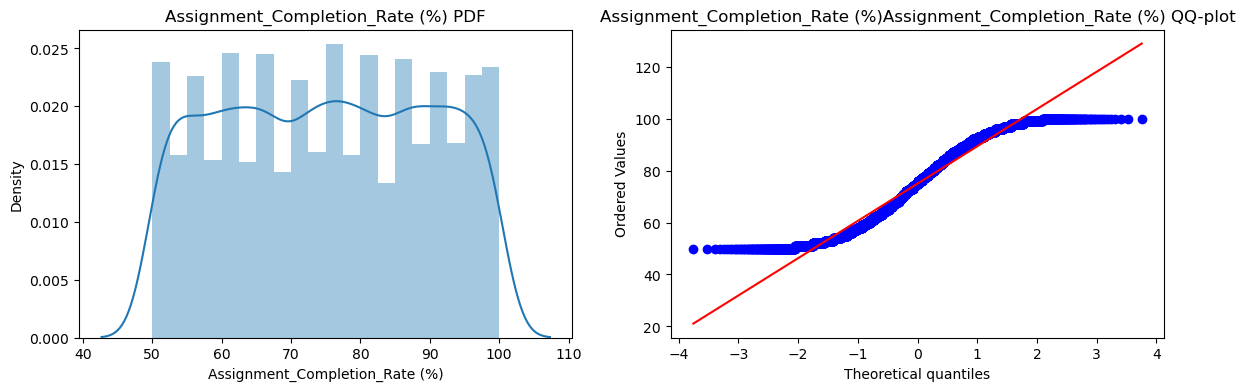

In [104]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot(X_train['Assignment_Completion_Rate (%)'])
plt.title('Assignment_Completion_Rate (%) PDF')

plt.subplot(122)
stats.probplot(X_train['Assignment_Completion_Rate (%)'], dist='norm', plot=plt)
plt.title('Assignment_Completion_Rate (%)Assignment_Completion_Rate (%) QQ-plot')
plt.show()

In [105]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [106]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print('Accuracy LR : ', accuracy_score(y_test,y_pred))
print('Accuracy DT : ', accuracy_score(y_test,y_pred1))

Accuracy LR :  0.0175
Accuracy DT :  0.018


D:\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [107]:
trf = FunctionTransformer(func=np.log1p)

In [108]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [109]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [110]:
clf.fit(X_train_transformed, y_train)
clf2.fit(X_test_transformed, y_test)

y_pred = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print('Accuracy LR', accuracy_score(y_test, y_pred))
print('Accuracy DT', accuracy_score(y_test, y_pred2))

Accuracy LR 0.0195
Accuracy DT 0.9685


D:\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [131]:
X_transformed = trf.fit_transform(X)

clf= LogisticRegression()
clf2= DecisionTreeClassifier()

print('Accuracy LR',np.mean(cross_val_score(clf, X_transformed, Y, scoring='accuracy', cv=10)))
print('Accuracy DT',np.mean(cross_val_score(clf2, X_transformed, Y, scoring='accuracy', cv=10)))

D:\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_o

Accuracy LR 0.0178
Accuracy DT 0.0164
